In [1]:
from sympy import *
from sympy.solvers.solveset import nonlinsolve
from sympy.utilities.codegen import codegen
init_session()
x_A, y_A, x_B, y_B, Lambda, t_x, t_y, s, c = symbols('x_A y_A x_B y_B Lambda t_x t_y s c')

IPython console for SymPy 1.3 (Python 2.7.15-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [2]:
M = Matrix([[Lambda*c, -Lambda*s, t_x], [Lambda*s, Lambda*c, t_y],[0,0,1]])

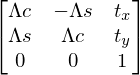

In [3]:
M

In [4]:
A=Matrix([[x_A],[y_A],[1]])

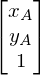

In [5]:
A

In [6]:
e1=M*A

In [7]:
B=Matrix([[x_B],[y_B],[1]])

In [8]:
e1[0]

In [9]:
e1[1]

In [10]:
e2=M*B

In [11]:
e2[0]

In [12]:
e2[1]

In [13]:
Eqns = [e1[0],e1[1],e2[0]-1,e2[1]-1]

In [14]:
Eqns

In [15]:
sols=linsolve(Eqns, c, s, t_x, t_y)

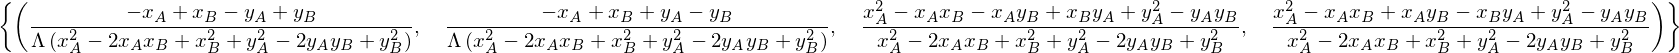

In [16]:
sols

In [17]:
for q in sols:
    print(q)

((-x_A + x_B - y_A + y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2)), (-x_A + x_B + y_A - y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2)), (x_A**2 - x_A*x_B - x_A*y_B + x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2), (x_A**2 - x_A*x_B + x_A*y_B - x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))


In [18]:
cc=(-x_A + x_B - y_A + y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))

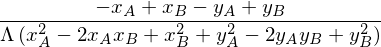

In [19]:
cc

In [20]:
ss=(-x_A + x_B + y_A - y_B)/(Lambda*(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))

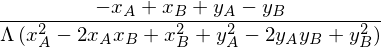

In [21]:
ss

In [22]:
Eqns2 = [e1[0],e1[1],e2[0]-1,e2[1]-1,s**2+c**2-1]

In [23]:
sols2=nonlinsolve(Eqns2,[c, s, t_x, t_y, Lambda])

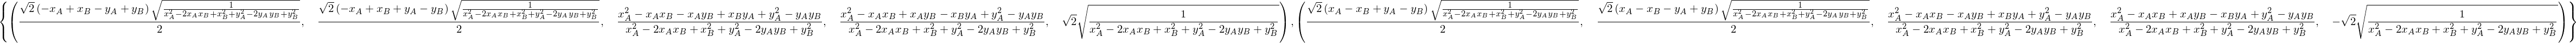

In [24]:
sols2

In [25]:
for q in sols2:
    print(q)

(sqrt(2)*(-x_A + x_B - y_A + y_B)*sqrt(1/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))/2, sqrt(2)*(-x_A + x_B + y_A - y_B)*sqrt(1/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))/2, (x_A**2 - x_A*x_B - x_A*y_B + x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2), (x_A**2 - x_A*x_B + x_A*y_B - x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2), sqrt(2)*sqrt(1/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2)))
(sqrt(2)*(x_A - x_B + y_A - y_B)*sqrt(1/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))/2, sqrt(2)*(x_A - x_B - y_A + y_B)*sqrt(1/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2))/2, (x_A**2 - x_A*x_B - x_A*y_B + x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2), (x_A**2 - x_A*x_B + x_A*y_B - x_B*y_A + y_A**2 - y_A*y_B)/(x_A**2 - 2*x_A*x_B + x_B**2 + y_A**2 - 2*y_A*y_B + y_B**2), -sqrt(2)*sqrt(1/(x_A**2 - 2*x_A

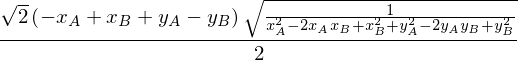

In [26]:
sols2.args[0][1] #https://stackoverflow.com/a/42466446

In [27]:
print("c="+ccode(sols2.args[0][0]))

c=(1.0/2.0)*M_SQRT2*(-x_A + x_B - y_A + y_B)*sqrt(1.0/(pow(x_A, 2) - 2*x_A*x_B + pow(x_B, 2) + pow(y_A, 2) - 2*y_A*y_B + pow(y_B, 2)))


In [28]:
print("s="+ccode(sols2.args[0][1]))

s=(1.0/2.0)*M_SQRT2*(-x_A + x_B + y_A - y_B)*sqrt(1.0/(pow(x_A, 2) - 2*x_A*x_B + pow(x_B, 2) + pow(y_A, 2) - 2*y_A*y_B + pow(y_B, 2)))


In [29]:
print("t_x="+ccode(sols2.args[0][2]))

t_x=(pow(x_A, 2) - x_A*x_B - x_A*y_B + x_B*y_A + pow(y_A, 2) - y_A*y_B)/(pow(x_A, 2) - 2*x_A*x_B + pow(x_B, 2) + pow(y_A, 2) - 2*y_A*y_B + pow(y_B, 2))


In [30]:
print("t_y="+ccode(sols2.args[0][3]))

t_y=(pow(x_A, 2) - x_A*x_B + x_A*y_B - x_B*y_A + pow(y_A, 2) - y_A*y_B)/(pow(x_A, 2) - 2*x_A*x_B + pow(x_B, 2) + pow(y_A, 2) - 2*y_A*y_B + pow(y_B, 2))


In [31]:
print("lambda="+ccode(sols2.args[0][4]))

lambda=M_SQRT2*sqrt(1.0/(pow(x_A, 2) - 2*x_A*x_B + pow(x_B, 2) + pow(y_A, 2) - 2*y_A*y_B + pow(y_B, 2)))


In [33]:
simplify(sols2.args[0][0]**2+sols2.args[0][1]**2)